<a href="https://colab.research.google.com/github/afdmoraes/GEOSelper/blob/main/Tarefa_5_afdm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Combinação de dados vetoriais e matriciais
Nesta pasta incluímos um exemplo mais avançado do uso das bibliotecas de forma integrada.

Baixe os dados para fazer upload no colab (disponível [aqui](https://colab.research.google.com/drive/1gAEj8aEGUPh-XOxnEri55xMuTQvE27Dy?usp=sharing)). 

Abrimos as geometrias e fizemos seleção de feições de acordo com propriedades calculadas. Esses cálculos foram realizados a partir da biblioteca rasterstats e a manipulação das geometrias foi feita com a biblioteca geopandas.

Por fim, exploramos de maneira breve a biblioteca folium, capaz de exibir mapas base (base maps) e incluir imagens e geometrias em forma de camadas.

**Downloads:**
 
ndwi_sentinel_reprojected.tifndwi_sentinel_reprojected.tif
 
*   streets.dbfstreets.dbf
*   streets.prjstreets.prj
*   streets.shpstreets.shp
*   streets.shxstreets.shx

# Tarefa da Semana 5

Esta é a quinta tarefa do curso de Programação para Sensoriamento Remoto. Novamente, crie um Jupyter Notebook no seu Google Colab para reportar os resultados obtidos. Inclua blocos de código e texto para informar as partes realizadas. 

Faça o download do arquivo [crop_rapideye_fx.zip](https://https://drive.google.com/file/d/1V429Z9wTwvbDygSnIXdxM8twy0PSqIN4/view?usp=sharing), descompacte e faça o upload na sua pasta do Google Colab.


**Atividades**

*   (a) Crie um bloco de código para a instalação dos pacotes necessários para o uso da biblioteca GeoPandas.

Faça o download do arquivo [crop_rapideye_fx.zip](https://https://moodle.dpi.inpe.br/mod/resource/view.php?id=3730), descompacte e faça o upload na sua pasta do Google Colab. Este conjunto de arquivos representa uma segmentação da imagem [crop_rapideye.tif](https://moodle.dpi.inpe.br/mod/resource/view.php?id=3713), e contém para cada objeto, um conjunto de atributos, incluindo a média dos valores de **NDWI** e **NDVI** (**NDWI_mean**, **NDVI_mean**).

*   (b) Mostre a quantidade de objetos geográficos presentes no arquivo, e apresente as primeiras linhas do GeoDataFrame correspondente ao arquivo crop_rapideye_fx.shp.
---
*   (c) Apresente uma visualização dos objetos, utilizando cor de fundo branca, e linhas azuis.
---
*   (d) Selecione, e mostre os polígonos que correspondem aos alvos de água, com base na regra utilizada na Semana 4 (NDWI > 0.0: água), com a cor de fundo azul.
(e) Selecione, e mostre os polígonos que correspondem aos alvos de vegetação, com base na regra utilizada na Semana 4 (NDVI > 0.5: vegetação), com a cor de fundo verde. Nesta figura, plote também os objetos detectados na operação anterior (água).
---

Atenção: apresente o link do seu Jupyter Notebook, através da opção Compartilhar do próprio Google Colab, da seguinte forma:

- Compartilhar
- Mudar para qualquer pessoa com o link
- Copiar link

In [1]:
# (a) Crie um bloco de código para a instalação dos pacotes necessários para o uso da biblioteca GeoPandas.
# Faça o download do arquivo crop_rapideye_fx.zip, descompacte e faça o upload na sua pasta do Google Colab.
#  Este conjunto de arquivos representa uma segmentação da imagem crop_rapideye.tif, e contém para cada objeto,
#  um conjunto de atributos, incluindo a média dos valores de NDWI e NDVI (NDWI_mean, NDVI_mean).

# instalação das bibliotecas rasterstats, rasterio, geopandas
!pip install rasterstats
!pip install rasterio==1.1.8
!pip install --upgrade geopandas

# importação das bibliotecas necessárias
from rasterstats import zonal_stats
import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import geopandas as gpd
import folium
from matplotlib import cm

#import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.6 MB 4.9 MB/s 
     |████████████████████████████████| 139 kB 48.5 MB/s 
     |████████████████████████████████| 20.9 MB 1.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.2 MB 615 kB/s 
  Attempting uninstall: rasterio
    Found existing installation: rasterio 1.3.4
    Uninstalling rasterio-1.3.4:
      Successfully uninstalled rasterio-1.3.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.9 MB/s 
     |████████████████████████████████| 7.8 MB 54.4 MB/s 


In [3]:
# (b) Mostre a quantidade de objetos geográficos presentes no arquivo, e 
#  apresente as primeiras linhas do GeoDataFrame correspondente ao arquivo
#  crop_rapideye_fx.shp.

# abrir a imagem NDWI com a mesma projeção 
# dos vetores de ruas
reprojected_raster = rio.open('./crop_rapideye_fx/crop_rapideye.tif')
ndwi = reprojected_raster.read()[0].astype(float)

# abrir as geometrias
streets = gpd.read_file('./crop_rapideye_fx/crop_rapideye_fx.shp', encoding='utf-8')
     

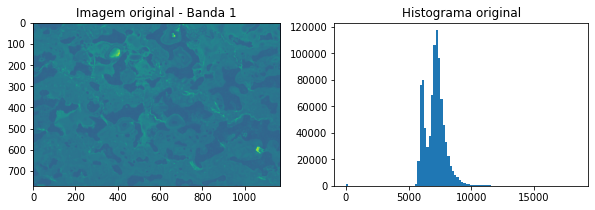

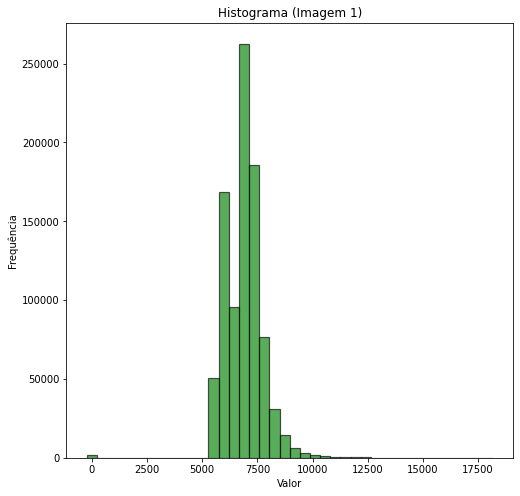

In [22]:
# VISUALIZAR A IMAGEM = USANDO O SCRIPT EXEMPLO - BANDA 1
# importar a biblioteca gdal e a matplotlib
from osgeo import gdal
import matplotlib.pyplot as plt

# informar o uso de excecoes
gdal.UseExceptions()

# Abrir a primeira imagem (1)
dataset = gdal.Open('./crop_rapideye_fx/crop_rapideye.tif', gdal.GA_ReadOnly)

# obter a banda (1)
banda = dataset.GetRasterBand(1)

# obter a matriz de pixels da banda  (1)
matriz = banda.ReadAsArray().astype(int)

# plotar a imagem e o histograma (1)
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.imshow(matriz)
#plt.imshow(matriz, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem original - Banda 1');
plt.subplot(122)
plt.hist(matriz.flatten(), bins=100)
plt.title('Histograma original');

# (a) abra as 2 imagens utilizando a GDAL, e gere uma visualização de cada imagem e de seu histograma

# Vamos considerar o seguinte exemplo extraído da galeria da Matplotlib e do site da NumPy: Gerando Histrograma
values = matriz.flatten()

plt.figure( figsize=(8, 8) )
plt.hist(values, bins=40, density=False, align='left',
         facecolor='green', edgecolor='black', linewidth=1.2, alpha=0.65);
       
plt.title(r"Histograma (Imagem 1)")
plt.xlabel("Valor")
plt.ylabel("Frequência");


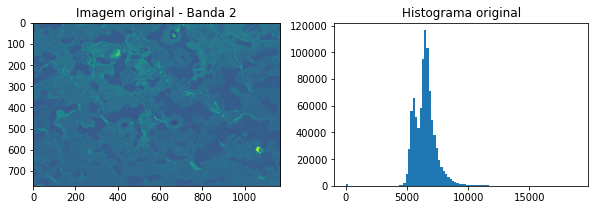

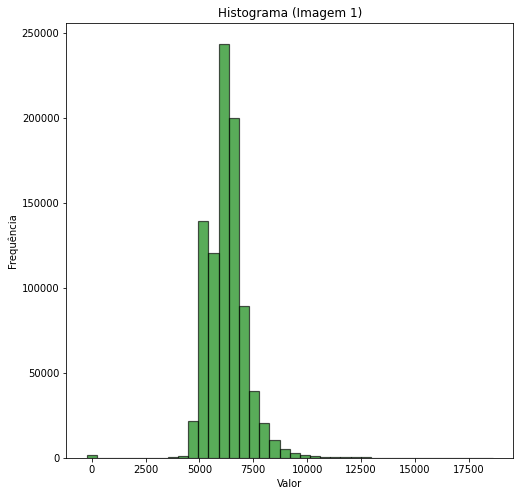

In [23]:
# VISUALIZAR A IMAGEM = USANDO O SCRIPT EXEMPLO - BANDA 2
# importar a biblioteca gdal e a matplotlib
from osgeo import gdal
import matplotlib.pyplot as plt

# informar o uso de excecoes
gdal.UseExceptions()

# Abrir a primeira imagem (1)
dataset = gdal.Open('./crop_rapideye_fx/crop_rapideye.tif', gdal.GA_ReadOnly)

# obter a banda (1)
banda = dataset.GetRasterBand(2)

# obter a matriz de pixels da banda  (1)
matriz = banda.ReadAsArray().astype(int)

# plotar a imagem e o histograma (1)
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.imshow(matriz)
#plt.imshow(matriz, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem original - Banda 2');
plt.subplot(122)
plt.hist(matriz.flatten(), bins=100)
plt.title('Histograma original');

# (a) abra as 2 imagens utilizando a GDAL, e gere uma visualização de cada imagem e de seu histograma

# Vamos considerar o seguinte exemplo extraído da galeria da Matplotlib e do site da NumPy: Gerando Histrograma
values = matriz.flatten()

plt.figure( figsize=(8, 8) )
plt.hist(values, bins=40, density=False, align='left',
         facecolor='green', edgecolor='black', linewidth=1.2, alpha=0.65);
       
plt.title(r"Histograma (Imagem 1)")
plt.xlabel("Valor")
plt.ylabel("Frequência");

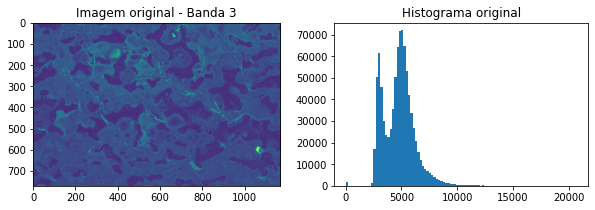

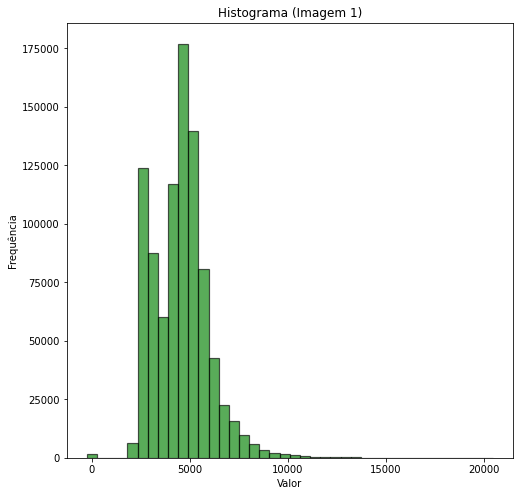

In [24]:
# VISUALIZAR A IMAGEM = USANDO O SCRIPT EXEMPLO - BANDA 3
# importar a biblioteca gdal e a matplotlib
from osgeo import gdal
import matplotlib.pyplot as plt

# informar o uso de excecoes
gdal.UseExceptions()

# Abrir a primeira imagem (1)
dataset = gdal.Open('./crop_rapideye_fx/crop_rapideye.tif', gdal.GA_ReadOnly)

# obter a banda (1)
banda = dataset.GetRasterBand(3)

# obter a matriz de pixels da banda  (1)
matriz = banda.ReadAsArray().astype(int)

# plotar a imagem e o histograma (1)
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.imshow(matriz)
#plt.imshow(matriz, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem original - Banda 3');
plt.subplot(122)
plt.hist(matriz.flatten(), bins=100)
plt.title('Histograma original');

# (a) abra as 2 imagens utilizando a GDAL, e gere uma visualização de cada imagem e de seu histograma

# Vamos considerar o seguinte exemplo extraído da galeria da Matplotlib e do site da NumPy: Gerando Histrograma
values = matriz.flatten()

plt.figure( figsize=(8, 8) )
plt.hist(values, bins=40, density=False, align='left',
         facecolor='green', edgecolor='black', linewidth=1.2, alpha=0.65);
       
plt.title(r"Histograma (Imagem 1)")
plt.xlabel("Valor")
plt.ylabel("Frequência");

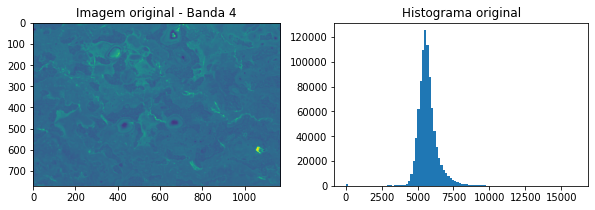

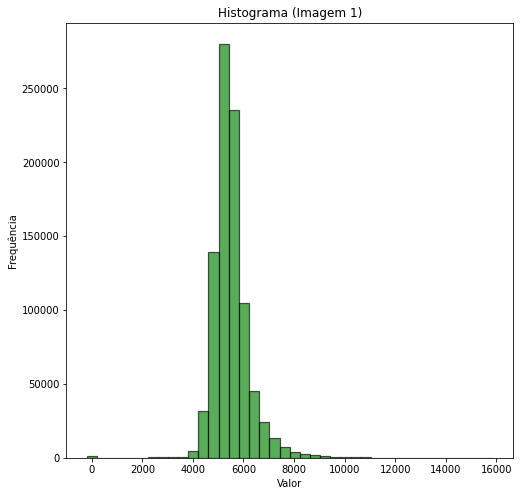

In [25]:
# VISUALIZAR A IMAGEM = USANDO O SCRIPT EXEMPLO - BANDA 4
# importar a biblioteca gdal e a matplotlib
from osgeo import gdal
import matplotlib.pyplot as plt

# informar o uso de excecoes
gdal.UseExceptions()

# Abrir a primeira imagem (1)
dataset = gdal.Open('./crop_rapideye_fx/crop_rapideye.tif', gdal.GA_ReadOnly)

# obter a banda (1)
banda = dataset.GetRasterBand(4)

# obter a matriz de pixels da banda  (1)
matriz = banda.ReadAsArray().astype(int)

# plotar a imagem e o histograma (1)
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.imshow(matriz)
#plt.imshow(matriz, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem original - Banda 4');
plt.subplot(122)
plt.hist(matriz.flatten(), bins=100)
plt.title('Histograma original');

# (a) abra as 2 imagens utilizando a GDAL, e gere uma visualização de cada imagem e de seu histograma

# Vamos considerar o seguinte exemplo extraído da galeria da Matplotlib e do site da NumPy: Gerando Histrograma
values = matriz.flatten()

plt.figure( figsize=(8, 8) )
plt.hist(values, bins=40, density=False, align='left',
         facecolor='green', edgecolor='black', linewidth=1.2, alpha=0.65);
       
plt.title(r"Histograma (Imagem 1)")
plt.xlabel("Valor")
plt.ylabel("Frequência");

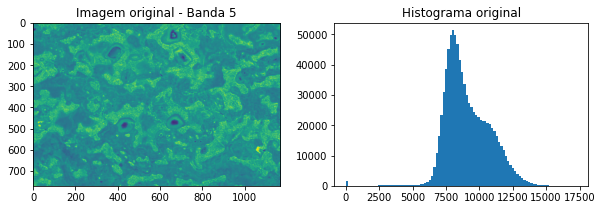

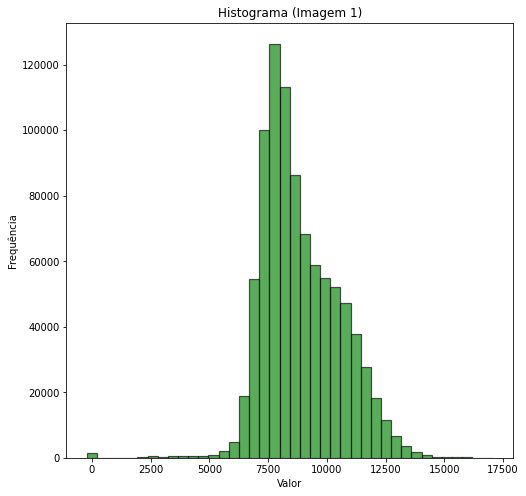

In [26]:
# VISUALIZAR A IMAGEM = USANDO O SCRIPT EXEMPLO - BANDA 5
# importar a biblioteca gdal e a matplotlib
from osgeo import gdal
import matplotlib.pyplot as plt

# informar o uso de excecoes
gdal.UseExceptions()

# Abrir a primeira imagem (1)
dataset = gdal.Open('./crop_rapideye_fx/crop_rapideye.tif', gdal.GA_ReadOnly)

# obter a banda (1)
banda = dataset.GetRasterBand(5)

# obter a matriz de pixels da banda  (1)
matriz = banda.ReadAsArray().astype(int)

# plotar a imagem e o histograma (1)
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.imshow(matriz)
#plt.imshow(matriz, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem original - Banda 5');
plt.subplot(122)
plt.hist(matriz.flatten(), bins=100)
plt.title('Histograma original');

# (a) abra as 2 imagens utilizando a GDAL, e gere uma visualização de cada imagem e de seu histograma

# Vamos considerar o seguinte exemplo extraído da galeria da Matplotlib e do site da NumPy: Gerando Histrograma
values = matriz.flatten()

plt.figure( figsize=(8, 8) )
plt.hist(values, bins=40, density=False, align='left',
         facecolor='green', edgecolor='black', linewidth=1.2, alpha=0.65);
       
plt.title(r"Histograma (Imagem 1)")
plt.xlabel("Valor")
plt.ylabel("Frequência");

In [29]:
# abrir a imagem NDWI com a mesma projeção 
# dos vetores de ruas
reprojected_raster = rio.open('./crop_rapideye_fx/crop_rapideye.tif')
ndwi = reprojected_raster.read()[0].astype(float)

# abrir as geometrias
streets = gpd.read_file('./crop_rapideye_fx/crop_rapideye_fx.shp', encoding='utf-8'

# vamos alterar o intervalo de valores da imagem
# apenas para visualizar, pois é desta maneira
# que o folium trabalha
# a imagem NDWI, com intervalo original entre -1 e +1
# podemos alterar o intervalo para [0, 254], somando
# os valores com +1, e esse resultado multiplicamos
# por 127
 ndwi_folium = 127 * (ndwi + 1)

# podemos criar uma visualização de um mapa
# (basemap) através da biblioteca folium
# centralizado de acordo com a imagem NDWI
m = folium.Map(location=[(north + south)/2, (east + west)/2], 
               zoom_start=13,
               tiles='CartoDB Positron')

# adicionar uma visualização da imagem NDWI
folium.raster_layers.ImageOverlay(ndwi_folium, 
                                  opacity=.7, 
                                  bounds=[[north, east], [south, west]],
                                  name="NDWI").add_to(m)

# adicionar o mapa de ruas na cor azul e as
# ruas afetadas na cor verde
folium.GeoJson(streets_json, name="Todas as ruas", 
               style_function = lambda x: {'color': 'blue', 'width': 0.5}).add_to(m)
folium.GeoJson(affected_streets_json, name="Ruas afetadas", 
               style_function = lambda x: {'color': 'green', 'width': 0.5}).add_to(m)

# permitir a escolha de camadas (layers) 
folium.LayerControl().add_to(m)

# visualizar o mapa
m

SyntaxError: ignored


# (b) Mostre a quantidade de objetos geográficos presentes no arquivo, e apresente as primeiras linhas do GeoDataFrame correspondente ao arquivo crop_rapideye_fx.shp.

In [31]:
%matplotlib inline

import geopandas as gpd

serie = gpd.read_file('./crop_rapideye_fx/crop_rapideye_fx.shp', encoding='utf-8')

serie.head()

,NDWI_mean,NDWI_std,NDWI_ampli,NDVI_mean,NDVI_std,NDVI_ampli,geometry
0,-0.000386,0.005679,0.109003,0.000496,0.008269,0.179296,"POLYGON ((508810.000 7857490.000, 508815.000 7..."
1,-0.116219,0.063107,0.535469,0.245190,0.100872,0.600505,"POLYGON ((508815.000 7857490.000, 508820.000 7..."
2,-0.317226,0.052270,0.373456,0.542219,0.079169,0.512274,"POLYGON ((508920.000 7857490.000, 508925.000 7..."
3,-0.094562,0.059573,0.428321,0.213603,0.088258,0.678848,"POLYGON ((509535.000 7857490.000, 509540.000 7..."
4,-0.092566,0.072425,0.480714,0.200213,0.108219,0.665809,"POLYGON ((509825.000 7857490.000, 509830.000 7..."


In [33]:
# Podemos utilizar a função head(n) para obter n valores da série a partir do seu início:
serie.head(2)
 
# A função tail(n) permite obter os n valores ao final da série:
#  serie.tail(2)
  
# O operador [] (operador de indexação) permite acessar elementos específicos, ou partes da série:  
#  serie['a']
#  serie[0:3]
#  serie[-2:]
  

,NDWI_mean,NDWI_std,NDWI_ampli,NDVI_mean,NDVI_std,NDVI_ampli,geometry
0,-0.000386,0.005679,0.109003,0.000496,0.008269,0.179296,"POLYGON ((508810.000 7857490.000, 508815.000 7..."
1,-0.116219,0.063107,0.535469,0.245190,0.100872,0.600505,"POLYGON ((508815.000 7857490.000, 508820.000 7..."


In [34]:
# count: Número de elementos da coluna com valores diferentes de NaN.
serie.count()

NDWI_mean     1081
NDWI_std      1081
NDWI_ampli    1081
NDVI_mean     1081
NDVI_std      1081
NDVI_ampli    1081
geometry      1081
dtype: int64

In [37]:
  grupo_linhas = serie.groupby(by='NDWI_mean')

  grupo_linhas.count()

,NDWI_std,NDWI_ampli,NDVI_mean,NDVI_std,NDVI_ampli,geometry
NDWI_mean,,,,,,
-0.439482,1,1,1,1,1,1
-0.425381,1,1,1,1,1,1
-0.382673,1,1,1,1,1,1
-0.379719,1,1,1,1,1,1
-0.371397,1,1,1,1,1,1
...,...,...,...,...,...,...
0.185414,1,1,1,1,1,1
0.189022,1,1,1,1,1,1
0.191073,1,1,1,1,1,1


# (c) Apresente uma visualização dos objetos, utilizando cor de fundo branca, e linhas azuis.

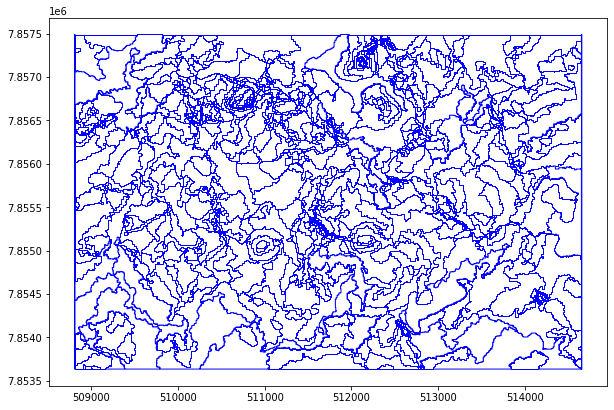

In [54]:
# Abrir arquivos

serie = gpd.read_file('./crop_rapideye_fx/crop_rapideye_fx.shp', encoding='utf-8')

# O comando acima irá criar um GeoDataFrame associado ao identificador focos.
# Podemos apresentar as primeiras linhas do GeoDataFrame através do método head():
serie.head()

# Para saber o número de focos carregados no GeoDataFrame, podemos utilizar a 
# função interna do Python len, como fizemos para os tipos lista e tupla:
len(serie)

# Podemos descobrir os tipos de dados das colunas do GeoDataFrame através do 
# atributo dtypes:
serie.dtypes

# Visualizando dados na forma de mapas
# Podemos visualizar os focos de queimada em um mapa utilizando a operação plot 
# do GeoDataFrame:
serie.plot(marker='x', color='white', linewidths=1, edgecolors='blue', markersize=5, figsize=(10, 10));

 #  O GeoPandas utiliza a Matplotlib para construção das visualizações e possui 
 # diversas facilidades para construção de mapas.
 

# (d) Selecione, e mostre os polígonos que correspondem aos alvos de água, com base na regra utilizada na Semana 4 (NDWI > 0.0: água), com a cor de fundo azul. 

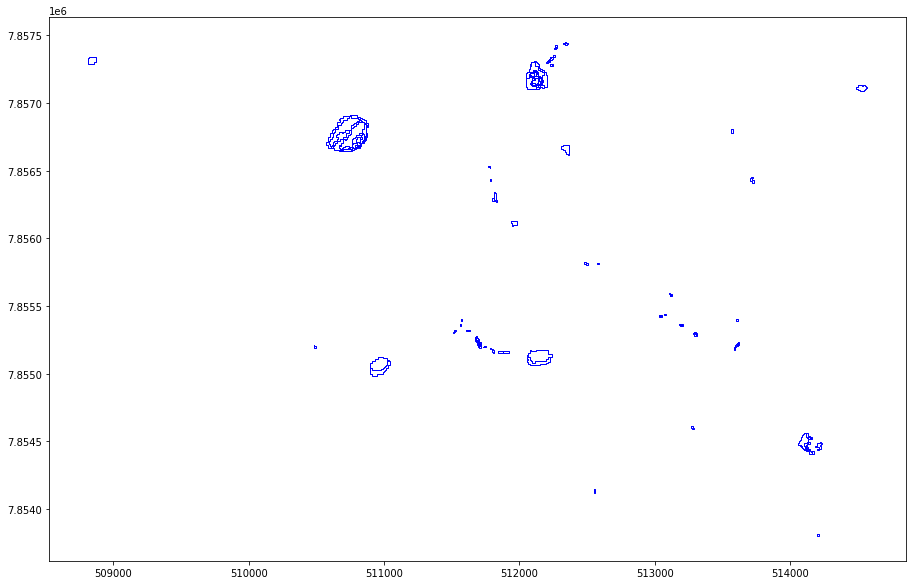

In [58]:
# SEMANA 4 
#       (NDWI > 0.0: água) e com a Cor de fundo azul
#        

import pandas as pd

serie['data_obser'] = pd.to_datetime(serie['NDWI_mean'])

serie.dtypes

# Repare que agora a coluna data_obser é do tipo datetime64, que nos permitirá 
# utilizar operações de data e hora nesta coluna.
# Agora, podemos realizar novamente a filtragem dos dados:
#serie_mg = serie[serie.NDWI_std > 0.0]
serie_mg = serie[serie.NDWI_mean > 0.0]


 #serie_mg_nov = serie_mg[serie_mg.data_obser.dt.month == 11]
# NDWI_std	> 0.0

# Finalmente, podemos criar o mapa:
serie_mg.plot(marker='x',  color='white', linewidths=1, edgecolors='blue', markersize=5, figsize=(20, 10));


# (e) Selecione, e mostre os polígonos que correspondem aos alvos de vegetação, com base na regra utilizada na Semana 4 (NDVI > 0.5: vegetação), com a cor de fundo verde. Nesta figura, plote também os objetos detectados na operação anterior (água).

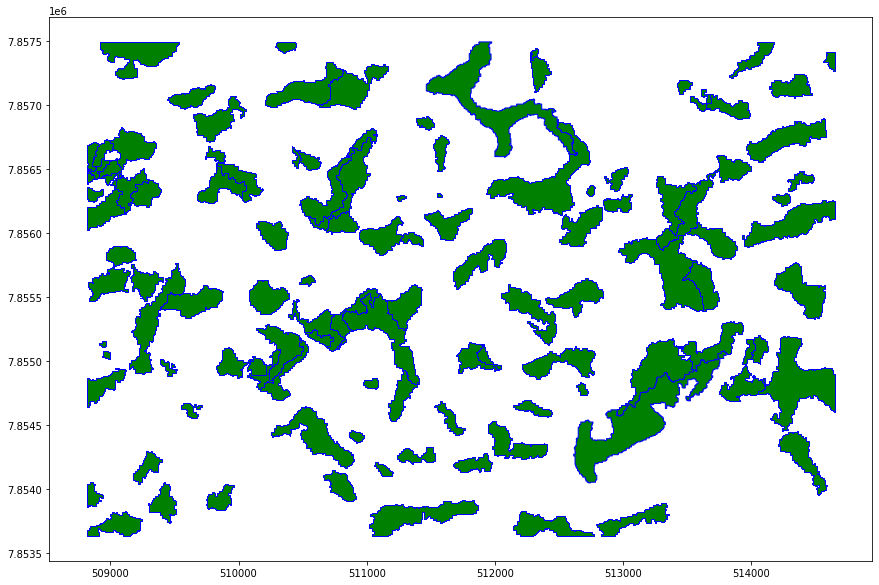

In [59]:
# Semana 4 
#       (NDVI > 0.5: vegetação), com a cor de fundo verde.
#        plote também os objetos detectados na operação anterior (água)
# SEMANA 4 
#       (NDVI > 0.0: água) e com a Cor de fundo azul
#        

import pandas as pd

serie['data_obser'] = pd.to_datetime(serie['NDVI_std'])

serie.dtypes

# Repare que agora a coluna data_obser é do tipo datetime64, que nos permitirá 
# utilizar operações de data e hora nesta coluna.
# Agora, podemos realizar novamente a filtragem dos dados:
#serie_mg = serie[serie.NDWI_std > 0.0]
serie_mg = serie[serie.NDVI_mean > 0.5]


# serie_mg_nov = serie_mg[serie_mg.data_obser.dt.month == 11]
# NDWI_std	> 0.0

# Finalmente, podemos criar o mapa:
serie_mg.plot(marker='x',  color='green', linewidths=1, edgecolors='blue', markersize=5, figsize=(20, 10));
